<a href="https://colab.research.google.com/github/Mahmoud-Ayman-Saleh/Test/blob/main/classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')


## Load Dataset

In [5]:
import pandas as pd

file_path = "adult.csv"

columns = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num',
    'marital-status', 'occupation', 'relationship', 'race', 'sex',
    'capital-gain', 'capital-loss', 'hours-per-week',
    'native-country', 'income'
]

df = pd.read_csv(
    file_path,
    names=columns,
    sep=',',
    na_values='?'
)

df.head()


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
2,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
4,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K


## Dataset Overview

In [6]:
print("Shape:", df.shape)
df.info()
df.isnull().sum()


Shape: (32562, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32562 entries, 0 to 32561
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32562 non-null  object
 1   workclass       30726 non-null  object
 2   fnlwgt          32562 non-null  object
 3   education       32562 non-null  object
 4   education-num   32562 non-null  object
 5   marital-status  32562 non-null  object
 6   occupation      30719 non-null  object
 7   relationship    32562 non-null  object
 8   race            32562 non-null  object
 9   sex             32562 non-null  object
 10  capital-gain    32562 non-null  object
 11  capital-loss    32562 non-null  object
 12  hours-per-week  32562 non-null  object
 13  native-country  31979 non-null  object
 14  income          32562 non-null  object
dtypes: object(15)
memory usage: 3.7+ MB


,0
age,0
workclass,1836
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,1843
relationship,0
race,0
sex,0


## Data Preprocessing

In [7]:
# Remove missing values
df.dropna(inplace=True)

# Encode categorical columns
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

df.head()


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,72,7,20263,16,16,7,14,6,5,2,118,90,94,41,2
2,65,2,2501,11,15,6,3,1,4,0,0,84,9,38,0
4,37,2,2971,5,10,0,6,4,4,0,0,82,34,38,0
5,24,2,12347,15,1,5,9,3,4,0,0,82,34,38,0
6,17,2,9727,11,15,0,7,4,4,0,0,81,39,38,0


## Prepare Data (Classification & Regression)

In [8]:
# Classification
X_class = df.drop('income', axis=1)
y_class = df['income']

# Regression (predict hours-per-week)
X_reg = df.drop('hours-per-week', axis=1)
y_reg = df['hours-per-week']


## Train-Test Split

In [9]:
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X_class, y_class, test_size=0.2, random_state=42, stratify=y_class
)

X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)


ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

In [10]:
y_class.value_counts()


,count
income,
0,22654
1,7508
2,1


In [11]:
df = df[df['income'].isin([0, 1])]


In [18]:
X_class = df.drop('income', axis=1)
y_class = df['income']

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X_class, y_class,
    test_size=0.2,
    random_state=42,
    stratify=y_class
)

X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(
    X_reg, y_reg,
    test_size=0.2,
    random_state=42
)


## Feature Scaling (For KNN)

In [19]:
scaler = StandardScaler()
X_train_c_scaled = scaler.fit_transform(X_train_c)
X_test_c_scaled = scaler.transform(X_test_c)


## Decision Tree Classifier

In [20]:
dt = DecisionTreeClassifier(
    max_depth=10,
    min_samples_split=50,
    min_samples_leaf=20,
    random_state=42
)

dt.fit(X_train_c, y_train_c)
y_pred_dt = dt.predict(X_test_c)

dt_acc = accuracy_score(y_test_c, y_pred_dt)
print("Decision Tree Accuracy:", dt_acc)
print(classification_report(y_test_c, y_pred_dt))


Decision Tree Accuracy: 0.8547986076578816
              precision    recall  f1-score   support

           0       0.87      0.94      0.91      4531
           1       0.77      0.59      0.67      1502

    accuracy                           0.85      6033
   macro avg       0.82      0.77      0.79      6033
weighted avg       0.85      0.85      0.85      6033



## KNN – Choose Best K

In [21]:
k_values = range(3, 21, 2)
k_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X_train_c_scaled, y_train_c, cv=5).mean()
    k_scores.append(score)

optimal_k = k_values[np.argmax(k_scores)]
optimal_k


17

## KNN Classifier

In [22]:
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train_c_scaled, y_train_c)
y_pred_knn = knn.predict(X_test_c_scaled)

knn_acc = accuracy_score(y_test_c, y_pred_knn)
print("KNN Accuracy:", knn_acc)
print(classification_report(y_test_c, y_pred_knn))


KNN Accuracy: 0.8335819658544671
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      4531
           1       0.68      0.62      0.65      1502

    accuracy                           0.83      6033
   macro avg       0.78      0.76      0.77      6033
weighted avg       0.83      0.83      0.83      6033



## Linear Regression

In [23]:
lr = LinearRegression()
lr.fit(X_train_r, y_train_r)

y_pred_lr = lr.predict(X_test_r)

mse = mean_squared_error(y_test_r, y_pred_lr)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_r, y_pred_lr)

print("RMSE:", rmse)
print("R2 Score:", r2)


RMSE: 12.356931722233051
R2 Score: 0.10078961740806391


## Confusion Matrices

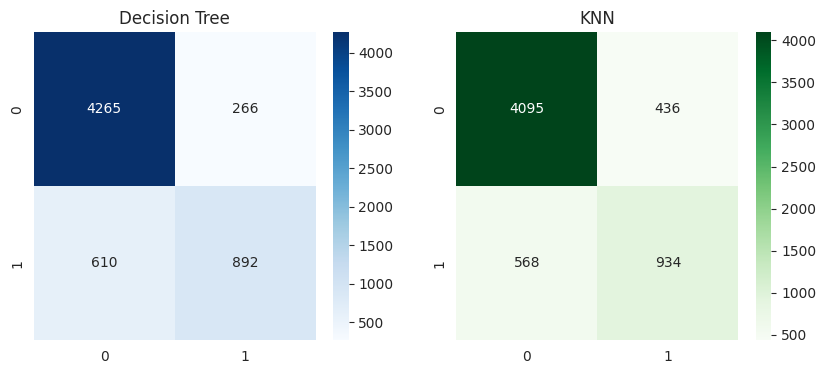

In [24]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_test_c, y_pred_dt),
            annot=True, fmt='d', cmap='Blues')
plt.title("Decision Tree")

plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test_c, y_pred_knn),
            annot=True, fmt='d', cmap='Greens')
plt.title("KNN")

plt.show()


## Model Comparison

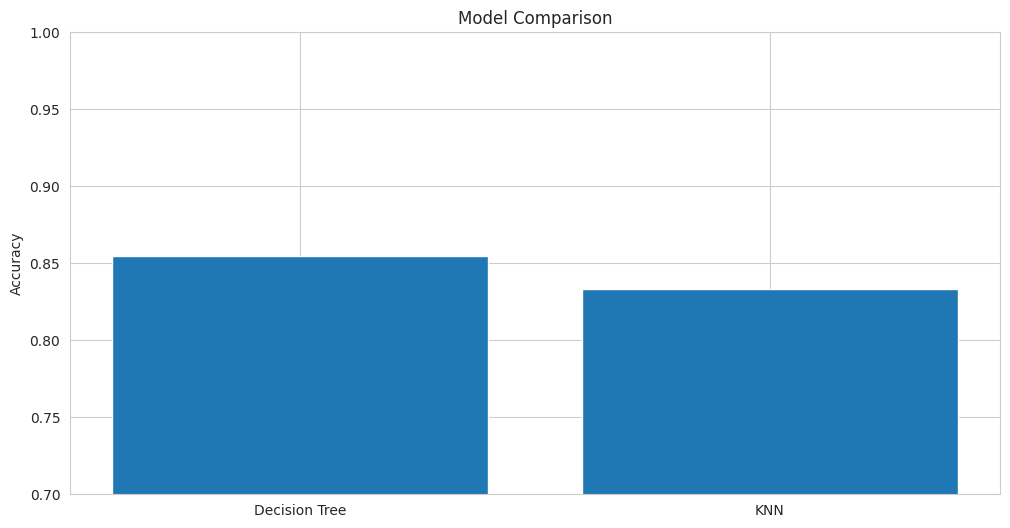

In [25]:
plt.bar(['Decision Tree', 'KNN'], [dt_acc, knn_acc])
plt.ylim(0.7, 1)
plt.ylabel("Accuracy")
plt.title("Model Comparison")
plt.show()


## Regression Visualization

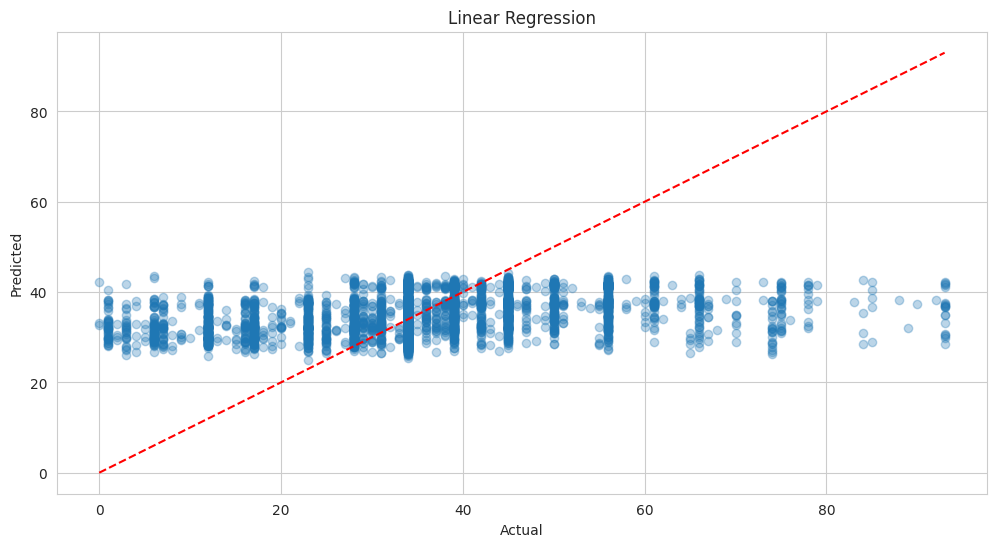

In [26]:
plt.scatter(y_test_r, y_pred_lr, alpha=0.3)
plt.plot([y_test_r.min(), y_test_r.max()],
         [y_test_r.min(), y_test_r.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Linear Regression")
plt.show()


## Final Summary

In [28]:
print("Decision Tree Accuracy:", dt_acc)
print("KNN Accuracy:", knn_acc)
print("Linear Regression R2:", r2)
print("Linear Regression RMSE:", rmse)


Decision Tree Accuracy: 0.8547986076578816
KNN Accuracy: 0.8335819658544671
Linear Regression R2: 0.10078961740806391
Linear Regression RMSE: 12.356931722233051
